In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv("/content/Retail_Transaction_Dataset.csv")
df.head()


,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [3]:
df.drop_duplicates(inplace=True)


In [4]:
df = df.dropna(subset=["CustomerID", "ProductID"])
df["Quantity"].fillna(df["Quantity"].median(), inplace=True)
df["Price"].fillna(df["Price"].median(), inplace=True)


/tmp/ipython-input-3380083884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Quantity"].fillna(df["Quantity"].median(), inplace=True)
/tmp/ipython-input-3380083884.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [5]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])


In [6]:
df["TotalAmount"] = df["Quantity"] * df["Price"]


In [7]:
top_products = df.groupby("ProductID")["TotalAmount"].sum().sort_values(ascending=False).head(10)
print(top_products)


ProductID
D    6.939486e+06
C    6.935294e+06
B    6.894257e+06
A    6.827764e+06
Name: TotalAmount, dtype: float64


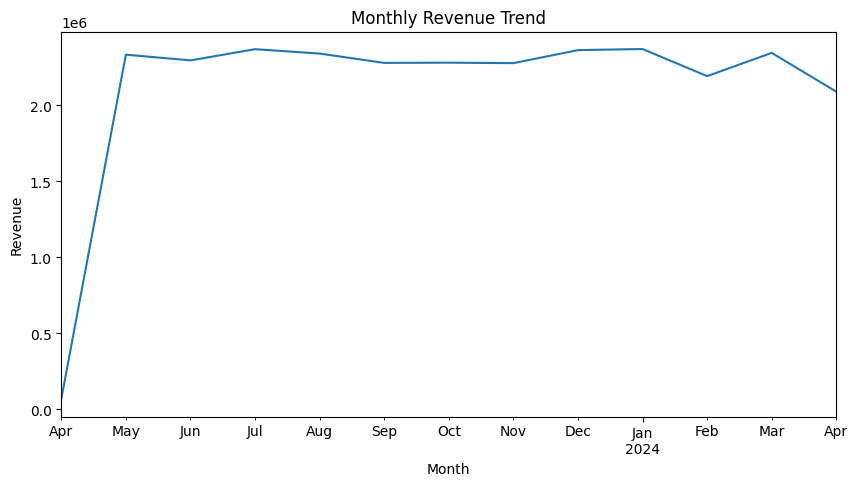

In [8]:
rev_trend = df.groupby(df["TransactionDate"].dt.to_period("M"))["TotalAmount"].sum()
rev_trend.plot(kind="line", figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [9]:
clv = df.groupby("CustomerID")["TotalAmount"].sum().sort_values(ascending=False)
print(clv.head(10))


CustomerID
32895     2148.373151
796166    1933.994331
980072    1846.993183
340516    1774.898036
392763    1739.307744
903169    1678.735948
98434     1628.848126
967685    1628.737743
107574    1628.627711
823783    1624.473006
Name: TotalAmount, dtype: float64


In [10]:
customer_df = df.groupby("CustomerID").agg({
    "TotalAmount": "sum",
    "Quantity": "sum"
}).reset_index()

customer_df.rename(columns={"TotalAmount": "TotalSpend", "Quantity": "TotalUnits"}, inplace=True)

customer_df.head()


,CustomerID,TotalSpend,TotalUnits
0,14,303.248606,5
1,42,622.031065,7
2,49,25.152676,1
3,59,268.633752,12
4,65,597.737233,8


In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(customer_df[["TotalSpend", "TotalUnits"]])


In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(scaled_data)


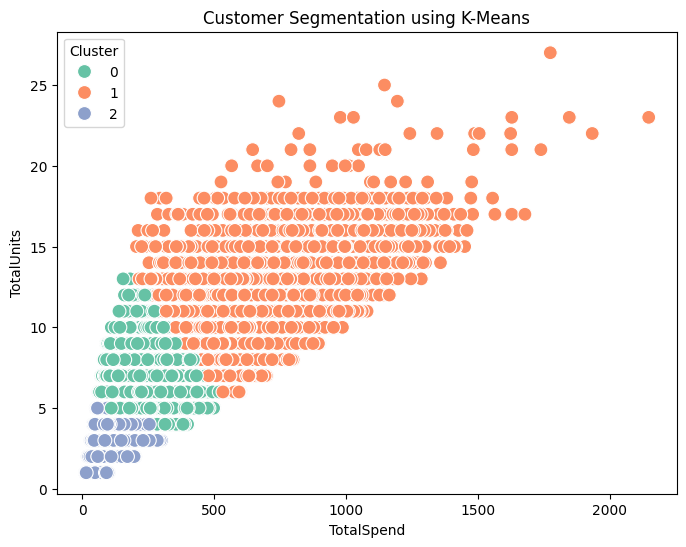

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=customer_df, x="TotalSpend", y="TotalUnits", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segmentation using K-Means")
plt.show()


In [14]:
print(customer_df.groupby("Cluster")["TotalSpend"].mean())
print(customer_df.groupby("Cluster")["TotalUnits"].mean())


Cluster
0    285.146495
1    629.802871
2    114.976540
Name: TotalSpend, dtype: float64
Cluster
0    6.303907
1    8.623400
2    2.411782
Name: TotalUnits, dtype: float64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


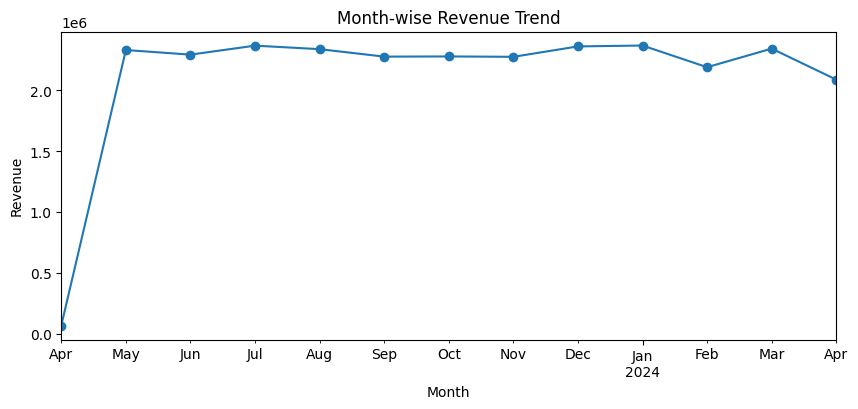

In [17]:
df["MonthYear"] = df["TransactionDate"].dt.to_period("M")
monthly_sales = df.groupby("MonthYear")["TotalAmount"].sum()

plt.figure(figsize=(10,4))
monthly_sales.plot(marker='o')
plt.title("Month-wise Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


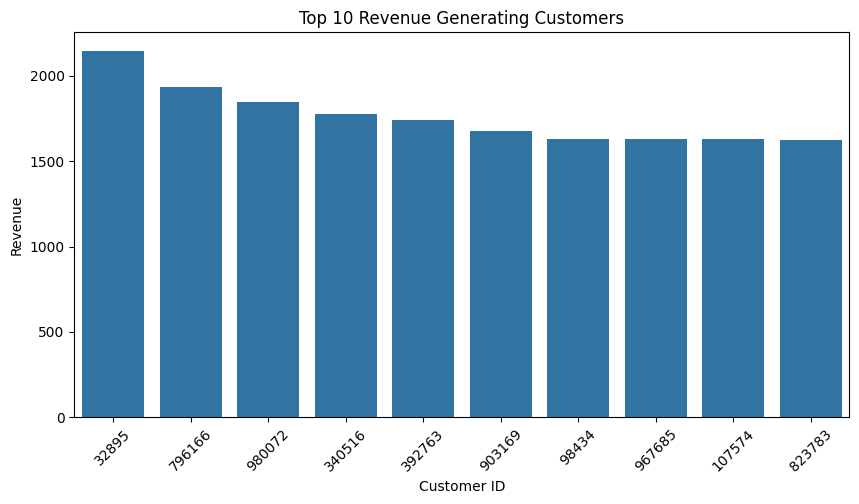

In [18]:
top10_customers = df.groupby("CustomerID")["TotalAmount"].sum()\
                    .sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10_customers.index.astype(str), y=top10_customers.values)
plt.xticks(rotation=45)
plt.title("Top 10 Revenue Generating Customers")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.show()


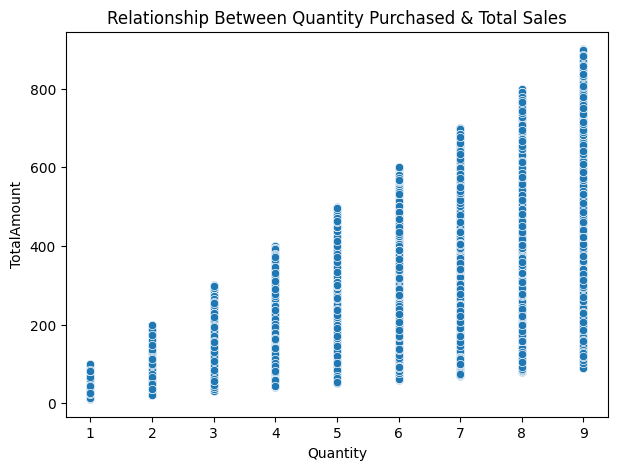

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Quantity", y="TotalAmount")
plt.title("Relationship Between Quantity Purchased & Total Sales")
plt.show()


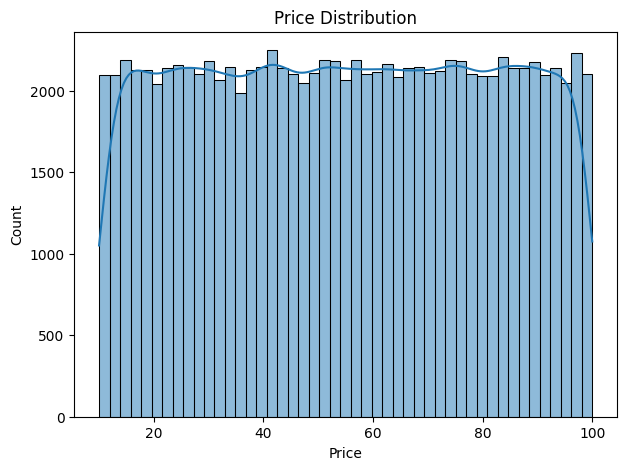

In [20]:
plt.figure(figsize=(7,5))
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()


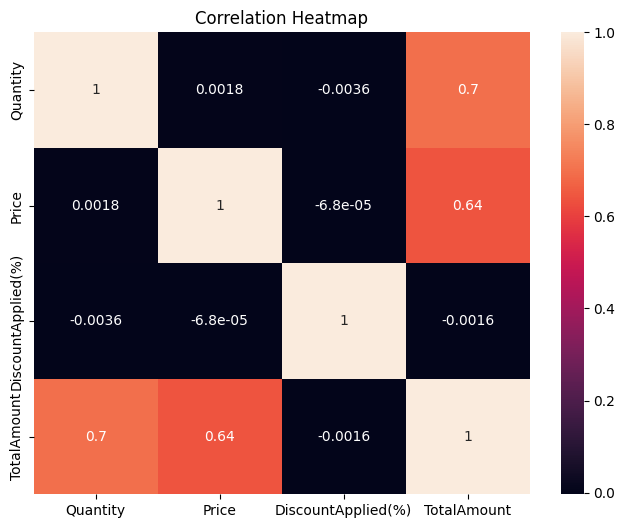

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Quantity", "Price", "DiscountApplied(%)", "TotalAmount"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


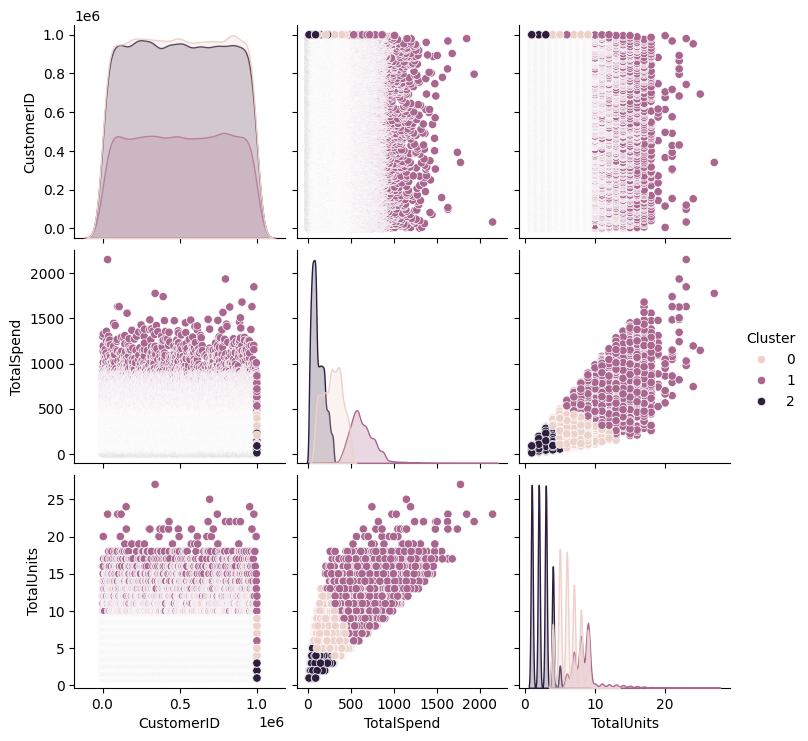

In [23]:
sns.pairplot(customer_df, hue="Cluster")
plt.show()
